Dataset link : https://www.kaggle.com/uciml/indian-liver-patient-records

### Context

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

* Age of the patient
* Gender of the patient 
* Total Bilirubin 
* Direct Bilirubin 
* Alkaline Phosphotase 
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens 
* Albumin 
* Albumin and Globulin Ratio 
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [1]:
!pip install modin

     |████████████████████████████████| 970 kB 4.0 MB/s            
     |████████████████████████████████| 962 kB 31.4 MB/s            
     |████████████████████████████████| 957 kB 61.8 MB/s            
     |████████████████████████████████| 956 kB 27.1 MB/s            
     |████████████████████████████████| 956 kB 46.9 MB/s            
     |████████████████████████████████| 761 kB 38.6 MB/s            
     |████████████████████████████████| 11.3 MB 32.1 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.4.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bsl

In [2]:
!pip install scikit-learn-intelex

     |████████████████████████████████| 115 kB 2.7 MB/s            
     |████████████████████████████████| 13.7 MB 19.1 MB/s            
     |████████████████████████████████| 69.2 MB 60.1 MB/s            
     |████████████████████████████████| 4.0 MB 64.6 MB/s            


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# Importing libraries
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("../input/indian-liver-patient-records/indian_liver_patient.csv")
%time

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


In [6]:
df.shape

(583, 11)

In [7]:
%time df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  --------------------------  --------------  -----  
 0   Age                         583 non-null    int64
 1   Gender                      583 non-null    object
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64
 5   Alamine_Aminotransferase    583 non-null    int64
 6   Aspartate_Aminotransferase  583 non-null    int64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64
dtypes: int64(5), float64(5), object(1)
memory usage: 50.2 KB
CPU times: user 126 ms, sys: 35 ms, total: 161 ms
Wall time: 204 ms


Only Albumin_and_Globulin_Ratio has 4 missing values 

In [8]:
df[df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [9]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [10]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  --------------------------  --------------  -----  
 0   Age                         583 non-null    int64
 1   Gender                      583 non-null    object
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64
 5   Alamine_Aminotransferase    583 non-null    int64
 6   Aspartate_Aminotransferase  583 non-null    int64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64
dtypes: int64(5), float64(5), object(1)
memory usage: 50.2 KB


In [11]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
%time df.describe()

CPU times: user 85.7 ms, sys: 15.8 ms, total: 101 ms
Wall time: 123 ms


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [13]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

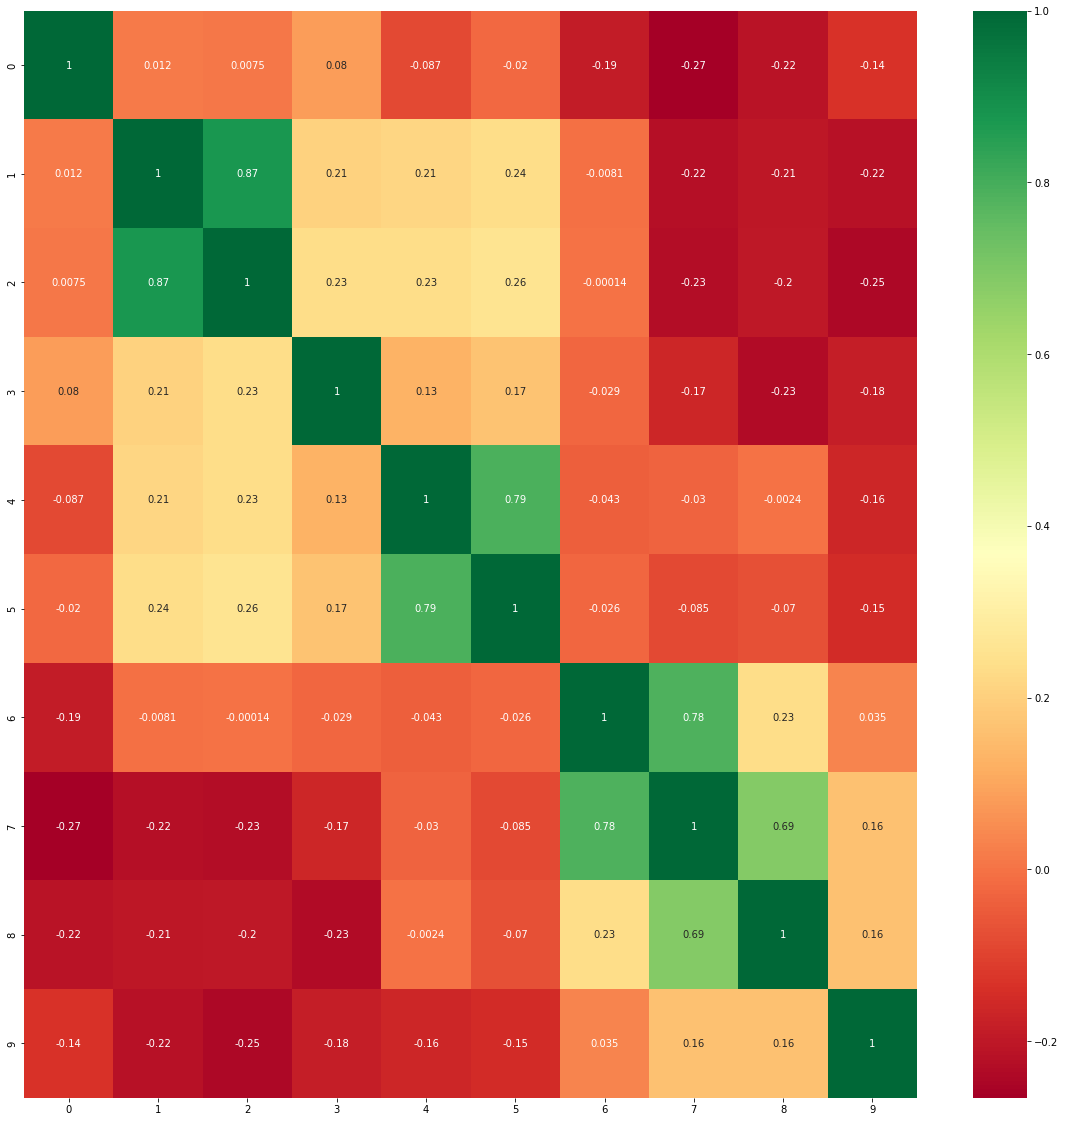

In [14]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [16]:
# checking dataset is balanced or not
true_count = len(df.loc[df['Dataset'] == 1])
false_count = len(df.loc[df['Dataset'] == 2])


In [17]:
true_count, false_count

(416, 167)

In [18]:
# plotting graph for output classes counts
# sns.countplot(x = 'Dataset',data = df)

In [19]:
# sns.countplot('Gender', data = df, hue = 'Dataset')

In [20]:
# sns.pairplot(df, hue = 'Dataset')

Only gender is object valued so we convert it to numeric

In [21]:
%time df = pd.get_dummies(df, columns = ['Gender'])

CPU times: user 49 ms, sys: 13.8 ms, total: 62.7 ms
Wall time: 76.6 ms


In [22]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [23]:
df.shape

(583, 12)

In [24]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split
feature_columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                   'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
                   'Gender_Female', 'Gender_Male']
predicted_class = ['Dataset']
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.78 µs


In [26]:
X = df[feature_columns]
y = df[predicted_class]

Oversampling to have balanced data

In [27]:
from imblearn.over_sampling import SMOTE
smk = SMOTE(random_state = 42)
X, y = smk.fit_resample(X,y)
X.shape, y.shape
%time

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 14.8 µs


In [28]:
# from imblearn.under_sampling import NearMiss
# nm = NearMiss()
# X, y = nm.fit_resample(X,y)
# X.shape, y.shape

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)
%time

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.5 µs


In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((582, 11), (250, 11), (582, 1), (250, 1))

In [31]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)
%time

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs


In [32]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy Using Intel OneAPI = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

Accuracy Using Intel OneAPI = 0.808
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.78 µs


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm
%time

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 14.5 µs


In [34]:
from xgboost import XGBClassifier
from sklearn import metrics

xg_model = XGBClassifier(random_state=42)
model_1 = xg_model.fit(X_train, y_train)

predict_train_data = model_1.predict(X_test)
print("Accuracy Using Intel OneAPI = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

[07:55:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Using Intel OneAPI = 0.812
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11.9 µs


In [35]:
from sklearn.ensemble import ExtraTreesClassifier

model_2 = ExtraTreesClassifier(random_state=123)
model_2.fit(X_train, y_train)
predict_train_data = model_2.predict(X_test)
print("Accuracy Using Intel OneAPI= {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

Accuracy Using Intel OneAPI= 0.832
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


In [36]:
# from sklearn.model_selection import GridSearchCV, KFold

# # Extra Tree
# # n_jobs=-1 to allow run it on all cores
# params = {
#     'n_estimators': [100, 200, 500],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_split': [1,2,4,5],
#     'min_samples_leaf': [1,2,4,5],
#     'max_leaf_nodes': [4,10,20,50,None]
# }

# gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
# gs3.fit(X_train, y_train)

# print('Best score:', gs3.best_score_)
# print('Best score:', gs3.best_params_)

In [37]:
import joblib
joblib.dump(model, "./xtrees_liver_oneapi.joblib")
%time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11.9 µs


In [38]:
from sklearnex import unpatch_sklearn
unpatch_sklearn()